### 1. Import a 311 NYC service request.
Reading, Understanding and Optimizing data : </br>
As a part of data wrangling, first, we need to read and understand the data (features/columns) very clearly. Once we understand the data properly, we can plan for subsequent steps. The data need to be simplified (reduction/simplification) for further analysis. With the simplified data (which can be analyzed in an easy way), we can predict (inferences) some insight that can be used for future purposes.

In [ ]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [78]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [79]:
data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
'''import io
import requests
c =requests.get('311_Service_Requests_from_2010_to_Present.csv',verify= False)
s=c.content
data = pd.read_csv(io.StringIO(s.decode('utf-8'))) '''


"import io\nimport requests\nc =requests.get('311_Service_Requests_from_2010_to_Present.csv',verify= False)\ns=c.content\ndata = pd.read_csv(io.StringIO(s.decode('utf-8'))) "

In [ ]:
# Looking for features (columns) 

data.columns

In [ ]:
data.info()

In [ ]:
# Setting the option to view all columns of the dataset and view the data for any 4 random entries

pd.set_option('display.max_columns',None)
data.sample(4)

Now, we need to understand each feature one by one. If the feature contains all Nun or all same entries or maybe, all different entries, then we will omit such columns, since these columns do not contain information that is statistically meaningful or can give us any trend.

For instance, the 'Unique Key' column has a different number for each entry whereas columns like 'Agency Name', 'Complaint Type' have a different group of lists from which we can predict which kind of complaint occurs more often (e.g frequency distribution). So we can improve our future prediction and even can take some precautions (if permissible).

In [ ]:
# Dropping columns and saving it in another data frame

data_mod = data.drop(columns=['Unique Key'],axis=1)
data_mod.columns

In [ ]:
# To evaluate distinguishable outcomes belong to this feature

pd.unique(data['Agency'])

In [9]:
# Frequency of the different outcomes

data['Agency'].value_counts()

NYPD    300698
Name: Agency, dtype: int64

In [10]:
data_mod = data_mod.drop(columns=['Agency'],axis=1)
pd.unique(data['Agency Name'])

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [11]:
data['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [12]:
data['Complaint Type'].value_counts().head(5)

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [13]:
data.Descriptor.value_counts().head(5)

Loud Music/Party                 61430
No Access                        56976
Posted Parking Sign Violation    22440
Loud Talking                     21584
Partial Access                   20068
Name: Descriptor, dtype: int64

In [14]:
data['Location Type'].value_counts().head(4)

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Name: Location Type, dtype: int64

In [15]:
data['Incident Zip'].value_counts().head(4)

11385.0    5167
11368.0    4298
11211.0    4225
11234.0    4150
Name: Incident Zip, dtype: int64

In [16]:
data['Incident Address'].value_counts().head(4)

1207 BEACH AVENUE          904
78-15 PARSONS BOULEVARD    505
89 MOORE STREET            480
177 LAREDO AVENUE          311
Name: Incident Address, dtype: int64

In [17]:
data['Street Name'].value_counts().head(5)

BROADWAY          3237
3 AVENUE          1241
SHERMAN AVENUE    1156
BEACH AVENUE      1109
BEDFORD AVENUE     979
Name: Street Name, dtype: int64

In [18]:
data['Cross Street 1'].value_counts().head(4)

BROADWAY    4338
BEND        4129
3 AVENUE    3112
5 AVENUE    3035
Name: Cross Street 1, dtype: int64

In [19]:
data['Cross Street 2'].value_counts().head(4)

BEND        4391
BROADWAY    3784
8 AVENUE    2766
DEAD END    2144
Name: Cross Street 2, dtype: int64

In [20]:
data['Intersection Street 1'].value_counts().head(4)

BROADWAY      672
170 STREET    441
44 STREET     355
6 AVENUE      348
Name: Intersection Street 1, dtype: int64

In [21]:
data['Intersection Street 2'].value_counts().head(4)

BROADWAY    1358
6 AVENUE     715
2 AVENUE     617
5 AVENUE     551
Name: Intersection Street 2, dtype: int64

In [22]:
data['Address Type'].value_counts().head(4)

ADDRESS         238644
INTERSECTION     43366
BLOCKFACE        12014
LATLONG           3509
Name: Address Type, dtype: int64

In [23]:
data['City'].value_counts().head(4)

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
Name: City, dtype: int64

In [24]:
data.Landmark.value_counts().head(5)

CENTRAL PARK              67
PROSPECT PARK             22
WASHINGTON SQUARE PARK    16
SUNSET PARK               13
UNION SQUARE PARK         13
Name: Landmark, dtype: int64

In [25]:
data['Facility Type'].value_counts()

Precinct    298527
Name: Facility Type, dtype: int64

In [26]:
data.Status.value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [27]:
data['Due Date'].value_counts().head(4)

11-07-15 7:34    9
06-07-15 6:23    9
07-12-15 7:04    9
11-02-15 6:12    8
Name: Due Date, dtype: int64

In [28]:
data['Resolution Description'].value_counts().head(4)

The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.    90490
The Police Department responded to the complaint and took action to fix the condition.                                                     61624
The Police Department responded and upon arrival those responsible for the condition were gone.                                            58031
The Police Department responded to the complaint and determined that police action was not necessary.                                      38211
Name: Resolution Description, dtype: int64

In [29]:
data['School Name'].value_counts()

Unspecified                        300697
Alley Pond Park - Nature Center         1
Name: School Name, dtype: int64

In [30]:
data['School Number'].value_counts()

Unspecified    300697
Q001                1
Name: School Number, dtype: int64

In [31]:
data['School Region'].value_counts()

Unspecified    300697
Name: School Region, dtype: int64

In [32]:
data['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [33]:
data['School Code'].value_counts()

Unspecified    300697
Name: School Code, dtype: int64

In [34]:
data['School Phone Number'].value_counts()

Unspecified    300697
7182176034          1
Name: School Phone Number, dtype: int64

In [35]:
data['School Address'].value_counts()

Unspecified                                     300697
Grand Central Parkway, near the soccer field         1
Name: School Address, dtype: int64

In [36]:
data['School City'].value_counts()

Unspecified    300697
QUEENS              1
Name: School City, dtype: int64

In [37]:
data['School State'].value_counts()

Unspecified    300697
NY                  1
Name: School State, dtype: int64

In [38]:
data['School Zip'].value_counts()

Unspecified    300697
Name: School Zip, dtype: int64

In [39]:
data['School Not Found'].value_counts()

N    300698
Name: School Not Found, dtype: int64

In [40]:
data['School or Citywide Complaint'].value_counts()

Series([], Name: School or Citywide Complaint, dtype: int64)

In [41]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [42]:
data_mod = data_mod.drop(columns=['School Name', 'School Number', 'School Region', 'School Code',
                              'School Phone Number', 'School Address', 'School City', 'School State',
                                 'School Zip', 'School Not Found', 'School or Citywide Complaint'],axis=1)

In [43]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [44]:
data['Vehicle Type'].value_counts()

Series([], Name: Vehicle Type, dtype: int64)

In [45]:
data['Taxi Company Borough'].value_counts()

Series([], Name: Taxi Company Borough, dtype: int64)

In [46]:
data['Taxi Pick Up Location'].value_counts()

Series([], Name: Taxi Pick Up Location, dtype: int64)

In [47]:
data_mod = data_mod.drop(columns=['Vehicle Type','Taxi Company Borough','Taxi Pick Up Location'],axis=1)

In [48]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [49]:
data['Bridge Highway Name'].value_counts().head(5)

FDR Dr                 33
Belt Pkwy              30
BQE/Gowanus Expwy      27
Staten Island Expwy    21
Cross Bronx Expwy      19
Name: Bridge Highway Name, dtype: int64

In [50]:
data['Bridge Highway Direction'].value_counts().head(4)

East/Queens Bound           21
Northbound/Uptown           20
North/Bronx Bound           20
West/Staten Island Bound    18
Name: Bridge Highway Direction, dtype: int64

In [51]:
data['Road Ramp'].value_counts()

Roadway    162
Ramp        51
Name: Road Ramp, dtype: int64

In [52]:
data['Bridge Highway Segment'].value_counts().head(6)

East 96th St (Exit 14) - Triborough Br (Exit 17)                              6
Bronx River Pkwy (Exit 4B) - Westchester Ave / White Plains Road (Exit 5A)    5
Westchester Ave / White Plains Road (Exit 5A) - Castle Hill Ave (Exit 5B)     3
Richmond Ave (Exit 7) - Victory Blvd (Exit 8)                                 3
BEGIN Staten Island Expwy (Exit 15N) - Lily Pond Ave/Bay St (Exit 15S)        3
East 177th St/Sheridan Expwy (I-895) (Exit 5)                                 3
Name: Bridge Highway Segment, dtype: int64

In [53]:
data['Garage Lot Name'].value_counts()

Series([], Name: Garage Lot Name, dtype: int64)

In [54]:
data['Ferry Direction'].value_counts()

Manhattan Bound    1
Name: Ferry Direction, dtype: int64

In [55]:
data['Ferry Terminal Name'].value_counts()

St. George Terminal (Staten Island)    1
Barberi                                1
Name: Ferry Terminal Name, dtype: int64

In [56]:
data_mod = data_mod.drop(columns=['Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)

In [57]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [58]:
data['Latitude'].value_counts().head(5)

40.830362    902
40.721959    505
40.703819    480
40.647132    362
40.708726    341
Name: Latitude, dtype: int64

In [59]:
data['Longitude'].value_counts().head(5)

-73.866022    902
-73.809697    505
-73.942073    480
-73.790654    341
-74.004623    340
Name: Longitude, dtype: int64

In [60]:
data['Location'].value_counts().head(4)

(40.83036235589997, -73.86602154214397)     902
(40.72195913199264, -73.80969682426189)     505
(40.703818970933284, -73.94207345177706)    476
(40.708726489323325, -73.7906539235748)     341
Name: Location, dtype: int64

In [61]:
data_mod.sample(10)

Created Date             Closed Date  \
6855    12/24/2015 12:51:50 AM  12/24/2015 05:45:03 AM   
257282           05-12-15 9:11          05-12-15 22:00   
270240          05-01-15 18:38          05-01-15 22:47   
221220          06-12-15 15:32          06-12-15 18:58   
39185   11/21/2015 08:28:50 PM  11/21/2015 09:45:50 PM   
224101           06-10-15 5:32          06-10-15 23:23   
186617           07-12-15 1:38           07-12-15 3:11   
253278  05/15/2015 11:40:52 PM  05/16/2015 02:23:43 AM   
89462           10-05-15 17:19          10-05-15 23:33   
253482  05/15/2015 09:49:47 PM  05/15/2015 11:25:01 PM   

                            Agency Name           Complaint Type  \
6855    New York City Police Department             Animal Abuse   
257282  New York City Police Department          Illegal Parking   
270240  New York City Police Department         Blocked Driveway   
221220  New York City Police Department  Noise - Street/Sidewalk   
39185   New York City Police Department       Noise - Commercial   
224101  New York City Police Department         Blocked Driveway   
186617  New York City Police Department  Noise - Street/Sidewalk   
253278  New York City Police Department      Homeless Encampment   
89462   New York City Police Department          Illegal Parking   
253482  New York City Police Department         Blocked Driveway   

                            Descriptor               Location Type  \
6855                         Neglected  Residential Building/House   
257282  Double Parked Blocking Traffic             Street/Sidewalk   
270240                       No Access             Street/Sidewalk   
221220                    Loud Talking             Street/Sidewalk   
39185                 Loud Music/Party         Club/Bar/Restaurant   
224101                       No Access             Street/Sidewalk   
186617                Loud Music/Party             Street/Sidewalk   
253278                             NaN  Residential Building/House   
89462   Double Parked Blocking Traffic             Street/Sidewalk   
253482                       No Access             Street/Sidewalk   

        Incident Zip      Incident Address       Street Name  \
6855         10016.0  150 LEXINGTON AVENUE  LEXINGTON AVENUE   
257282       11377.0                   NaN               NaN   
270240       10305.0     48 ANDREWS STREET    ANDREWS STREET   
221220       10031.0   612 WEST 135 STREET   WEST 135 STREET   
39185        10036.0    251 WEST 48 STREET    WEST 48 STREET   
224101       10457.0     1733 WEEKS AVENUE      WEEKS AVENUE   
186617       10032.0   565 WEST 173 STREET   WEST 173 STREET   
253278       10012.0        22 BOND STREET       BOND STREET   
89462        11232.0      946 1/2 4 AVENUE          4 AVENUE   
253482       11421.0       91-33 97 STREET         97 STREET   

                Cross Street 1      Cross Street 2 Intersection Street 1  \
6855            EAST 29 STREET      EAST 30 STREET                   NaN   
257282                     NaN                 NaN          TYLER AVENUE   
270240       OLYMPIA BOULEVARD       QUINCY AVENUE                   NaN   
221220                BROADWAY     RIVERSIDE DRIVE                   NaN   
39185                 BROADWAY            8 AVENUE                   NaN   
224101  CROSS BRONX EXPRESSWAY     EAST 175 STREET                   NaN   
186617          AUDUBON AVENUE  ST NICHOLAS AVENUE                   NaN   
253278        LAFAYETTE STREET              BOWERY                   NaN   
89462                35 STREET           36 STREET                   NaN   
253482                 91 ROAD            91 DRIVE                   NaN   

       Intersection Street 2  Address Type           City Landmark  \
6855                     NaN       ADDRESS       NEW YORK      NaN   
257282             61 STREET  INTERSECTION       WOODSIDE      NaN   
270240                   NaN       ADDRESS  STATEN ISLAND      NaN   
221220                   NaN       AD

In [62]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [63]:
# Final info.(features) after cleaning
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency Name                     300698 non-null  object 
 3   Complaint Type                  300698 non-null  object 
 4   Descriptor                      294784 non-null  object 
 5   Location Type                   300567 non-null  object 
 6   Incident Zip                    298083 non-null  float64
 7   Incident Address                256288 non-null  object 
 8   Street Name                     256288 non-null  object 
 9   Cross Street 1                  251419 non-null  object 
 10  Cross Street 2                  250919 non-null  object 
 11  Intersection Street 1           43858 non-null   object 
 12  Intersection Str

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

Now, converting the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [64]:
data_mod['Closed Date'] = pd.to_datetime(data_mod['Closed Date'])
data_mod['Created Date'] = pd.to_datetime(data_mod['Created Date'])

data_mod['Request_Closing_Time'] = data_mod['Closed Date'] - data_mod['Created Date']

#data_mod = data_mod[(data_mod.Request_Closing_Time)>=0]

In [65]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Created Date                    300698 non-null  datetime64[ns] 
 1   Closed Date                     298534 non-null  datetime64[ns] 
 2   Agency Name                     300698 non-null  object         
 3   Complaint Type                  300698 non-null  object         
 4   Descriptor                      294784 non-null  object         
 5   Location Type                   300567 non-null  object         
 6   Incident Zip                    298083 non-null  float64        
 7   Incident Address                256288 non-null  object         
 8   Street Name                     256288 non-null  object         
 9   Cross Street 1                  251419 non-null  object         
 10  Cross Street 2                  250919 non-n

In [66]:
data_mod.sample(4)

Created Date         Closed Date  \
45020  2015-11-16 09:34:52 2015-11-16 15:26:48   
196986 2015-07-02 23:12:00 2015-07-02 23:55:00   
232681 2015-06-02 23:09:00 2015-06-03 00:46:00   
278330 2015-04-23 08:20:12 2015-04-23 08:59:25   

                            Agency Name       Complaint Type  \
45020   New York City Police Department      Illegal Parking   
196986  New York City Police Department   Noise - Commercial   
232681  New York City Police Department   Noise - Commercial   
278330  New York City Police Department  Homeless Encampment   

                           Descriptor        Location Type  Incident Zip  \
45020   Posted Parking Sign Violation      Street/Sidewalk       10011.0   
196986                   Loud Talking     Store/Commercial       10472.0   
232681               Loud Music/Party  Club/Bar/Restaurant       11222.0   
278330                            NaN      Street/Sidewalk       10003.0   

            Incident Address        Street Name  Cross Street 1  \
45020     240 WEST 23 STREET     WEST 23 STREET        7 AVENUE   
196986     1207 BEACH AVENUE       BEACH AVENUE  GLEASON AVENUE   
232681  66 GREENPOINT AVENUE  GREENPOINT AVENUE     WEST STREET   
278330      41 COOPER SQUARE      COOPER SQUARE   EAST 6 STREET   

            Cross Street 2 Intersection Street 1 Intersection Street 2  \
45020             8 AVENUE                   NaN                   NaN   
196986  WESTCHESTER AVENUE                   NaN                   NaN   
232681     FRANKLIN STREET                   NaN                   NaN   
278330       EAST 7 STREET                   NaN                   NaN   

       Address Type      City Landmark Facility Type  Status  \
45020       ADDRESS  NEW YORK      NaN      Precinct  Closed   
196986      ADDRESS     BRONX      NaN      Precinct  Closed   
232681      ADDRESS  BROOKLYN      NaN      Precinct  Closed   
278330      ADDRESS  NEW YORK      NaN      Precinct  Closed   

                      Due Date  \
45020   11/16/2015 05:34:52 PM   
196986           07-03-15 7:12   
232681           06-03-15 7:09   
278330  04/23/2015 04:20:12 PM   

                                   Resolution Description  \
45020   The Police Department responded to the complai...   
196986  The Police Department responded to the complai...   
232681  The Police Department responded to the complai...   
278330  The Police Department responded to the complai...   

       Resolution Action Updated Date Community Board    Borough  \
45020          11/16/2015 03:26:49 PM    04 MANHATTAN  MANHATTAN   
196986                 07-02-15 23:55        09 BRONX      BRONX   
232681                  06-03-15 0:46     01 BROOKLYN   BROOKLYN   
278330         04/23/2015 08:59:25 AM    03 MANHATTAN  MANHATTAN   

        X Coordinate (State Plane)  Y Coordinate (State Plane)  \
45020                     985112.0                    210559.0   
196986                   1021327.0                    241829.0   
232681                    995784.0                    205164.0   
278330                    986811.0                    204638.0   

       Park Facility Name Park Borough Bridge Highway Name  \
45020         Unspecified    MANHATTAN                 NaN   
196986        Unspecified        BRONX                 NaN   
232681        Unspecified     BROOKLYN                 NaN   
278330        Unspecified    MANHATTAN                 NaN   

       Bridge Highway Direction Road Ramp Bridge Highway Segment   Latitude  \
45020                       NaN       NaN                    NaN  40.744612   
196986                      NaN       NaN                    NaN  40.830362   
232681                      NaN       NaN                    NaN  40.729797   
278330                      NaN       NaN                    NaN  40.728360   

        Longitude                                  Location  \
45020  -73.996889   (40.744612366935755, -73.9968891566609)   
196986 -73.866022   (40.83036235589997, -73.8660215

In [67]:
data_mod.columns

Index(['Created Date', 'Closed Date', 'Agency Name', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

Now, lets visualize some basic results that we can conclude from the data. For instance, which type of complaint is more dominant?
First, we will attempt the visualization of a single feature (complain type). Then, we will do the same for other features. 

In [68]:
# Measuring the frequency (occurence) of the different complaint

data_complaint = data['Complaint Type'].value_counts()
data_complaint = data_complaint.to_frame()
data_complaint = data_complaint.rename(columns={'Complaint Type':'Counts'})
data_complaint

Counts
Blocked Driveway            77044
Illegal Parking             75361
Noise - Street/Sidewalk     48612
Noise - Commercial          35577
Derelict Vehicle            17718
Noise - Vehicle             17083
Animal Abuse                 7778
Traffic                      4498
Homeless Encampment          4416
Noise - Park                 4042
Vending                      3802
Drinking                     1280
Noise - House of Worship      931
Posting Advertisement         650
Urinating in Public           592
Bike/Roller/Skate Chronic     427
Panhandling                   307
Disorderly Youth              286
Illegal Fireworks             168
Graffiti                      113
Agency Issues                   6
Squeegee                        4
Ferry Complaint                 2
Animal in a Park                1

In [69]:
# Evaluate the above in percentage
data_complaint['Percentage'] = np.around((data_complaint.Counts/data_complaint.Counts.sum())*100,decimals=2)
data_complaint

Counts  Percentage
Blocked Driveway            77044       25.62
Illegal Parking             75361       25.06
Noise - Street/Sidewalk     48612       16.17
Noise - Commercial          35577       11.83
Derelict Vehicle            17718        5.89
Noise - Vehicle             17083        5.68
Animal Abuse                 7778        2.59
Traffic                      4498        1.50
Homeless Encampment          4416        1.47
Noise - Park                 4042        1.34
Vending                      3802        1.26
Drinking                     1280        0.43
Noise - House of Worship      931        0.31
Posting Advertisement         650        0.22
Urinating in Public           592        0.20
Bike/Roller/Skate Chronic     427        0.14
Panhandling                   307        0.10
Disorderly Youth              286        0.10
Illegal Fireworks             168        0.06
Graffiti                      113        0.04
Agency Issues                   6        0.00
Squeegee                        4        0.00
Ferry Complaint                 2        0.00
Animal in a Park                1        0.00

In [70]:
# Keeping the major complaint types

data_complaint = data_complaint[data_complaint.Percentage>1.0]
data_complaint = data_complaint.reset_index()
data_complaint = data_complaint.rename(columns={'index':'Complaint Type'})
data_complaint

Complaint Type  Counts  Percentage
0          Blocked Driveway   77044       25.62
1           Illegal Parking   75361       25.06
2   Noise - Street/Sidewalk   48612       16.17
3        Noise - Commercial   35577       11.83
4          Derelict Vehicle   17718        5.89
5           Noise - Vehicle   17083        5.68
6              Animal Abuse    7778        2.59
7                   Traffic    4498        1.50
8       Homeless Encampment    4416        1.47
9              Noise - Park    4042        1.34
10                  Vending    3802        1.26

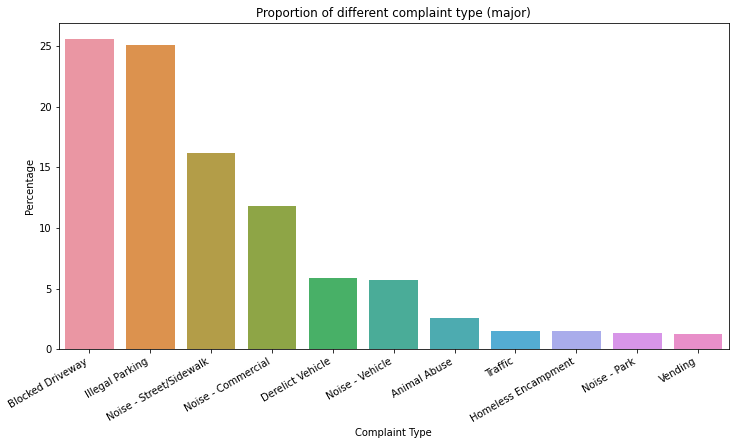

<Figure size 432x288 with 0 Axes>

In [71]:
# Visualization of the above evaluated dataset
plt.figure(figsize=(12,6))
com_type = sns.barplot(x=data_complaint['Complaint Type'],y=data_complaint.Percentage,data=data_complaint)
com_type.set_xticklabels(com_type.get_xticklabels(), rotation=30, ha="right")
plt.title('Proportion of different complaint type (major)')
plt.show()
plt.tight_layout()

From the above data (Counts and Percentage), it is clear that main complain comes from 'Blocked Driveway', 'Illegal Parking' and noise from Street/Sidewalk or Commercial. 

However, it is alluring to represent such results via visualization. And it is easy to realise the facts also. 

Now, we will do the same for several features.

In [72]:
# Applying the above procedure for Descriptor

data_descriptor = np.around(((data_mod['Descriptor'].value_counts()*100) / data_mod['Descriptor'].value_counts().sum()),
                            decimals=2)
data_descriptor = data_descriptor.to_frame()
data_descriptor = data_descriptor.rename(columns={'Descriptor':'Percentage'})
data_descriptor['Descriptor'] = data_descriptor.index
cols = data_descriptor.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_descriptor = data_descriptor[cols]
data_descriptor = data_descriptor[(data_descriptor.Percentage) >= 2.0]
data_descriptor = data_descriptor.reset_index()
data_descriptor = data_descriptor.drop(columns=['index'],axis=1)
data_descriptor

Descriptor  Percentage
0               Loud Music/Party       20.84
1                      No Access       19.33
2  Posted Parking Sign Violation        7.61
3                   Loud Talking        7.32
4                 Partial Access        6.81
5             With License Plate        6.01
6                Blocked Hydrant        5.46
7   Commercial Overnight Parking        4.13
8                Car/Truck Music        3.82
9               Blocked Sidewalk        3.77

In [73]:
# Applying the above procedure for Location Type

data_location_type = np.around(((data_mod['Location Type'].value_counts()*100) / data_mod['Location Type'].value_counts().sum()),
                            decimals=2)
data_location_type = data_location_type.to_frame()
data_location_type = data_location_type.rename(columns={'Location Type':'Percentage'})
data_location_type['Location Type'] = data_location_type.index
cols = data_location_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_location_type = data_location_type[cols]
data_location_type = data_location_type[(data_location_type.Percentage) >= 0.1]
data_location_type = data_location_type.reset_index()
data_location_type = data_location_type.drop(columns=['index'],axis=1)
data_location_type

Location Type  Percentage
0             Street/Sidewalk       82.94
1            Store/Commercial        6.78
2         Club/Bar/Restaurant        5.78
3  Residential Building/House        2.32
4             Park/Playground        1.59
5            House of Worship        0.31

In [74]:
# Applying the above procedure for City

data_city = np.around(((data_mod['City'].value_counts()*100) / data_mod['City'].value_counts().sum()),
                            decimals=2)
data_city = data_city.to_frame()
data_city = data_city.rename(columns={'City':'Percentage'})
data_city['City'] = data_city.index
cols = data_city.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_city = data_city[cols]
data_city = data_city[(data_city.Percentage) >= 1.0]
data_city = data_city.reset_index()
data_city = data_city.drop(columns=['index'],axis=1)
data_city

City  Percentage
0       BROOKLYN       32.98
1       NEW YORK       22.14
2          BRONX       13.65
3  STATEN ISLAND        4.14
4        JAMAICA        2.45
5        ASTORIA        2.12
6       FLUSHING        2.00
7      RIDGEWOOD        1.73
8         CORONA        1.44
9       WOODSIDE        1.19

In [75]:
# Applying the above procedure for Address Type

data_address_type = np.around(((data_mod['Address Type'].value_counts()*100) / data_mod['Address Type'].value_counts().sum()),
                            decimals=2)
data_address_type = data_address_type.to_frame()
data_address_type = data_address_type.rename(columns={'Address Type':'Percentage'})
data_address_type['Address Type'] = data_address_type.index
cols = data_address_type.columns.tolist()
cols = cols[-1:]+cols[:-1]
data_address_type = data_address_type[cols]
#data_address_type = data_address_type[(data_address_type.Percentage) >= 1.0]
data_address_type = data_address_type.reset_index()
data_address_type = data_address_type.drop(columns=['index'],axis=1)
data_address_type

Address Type  Percentage
0       ADDRESS       80.11
1  INTERSECTION       14.56
2     BLOCKFACE        4.03
3       LATLONG        1.18
4     PLACENAME        0.12

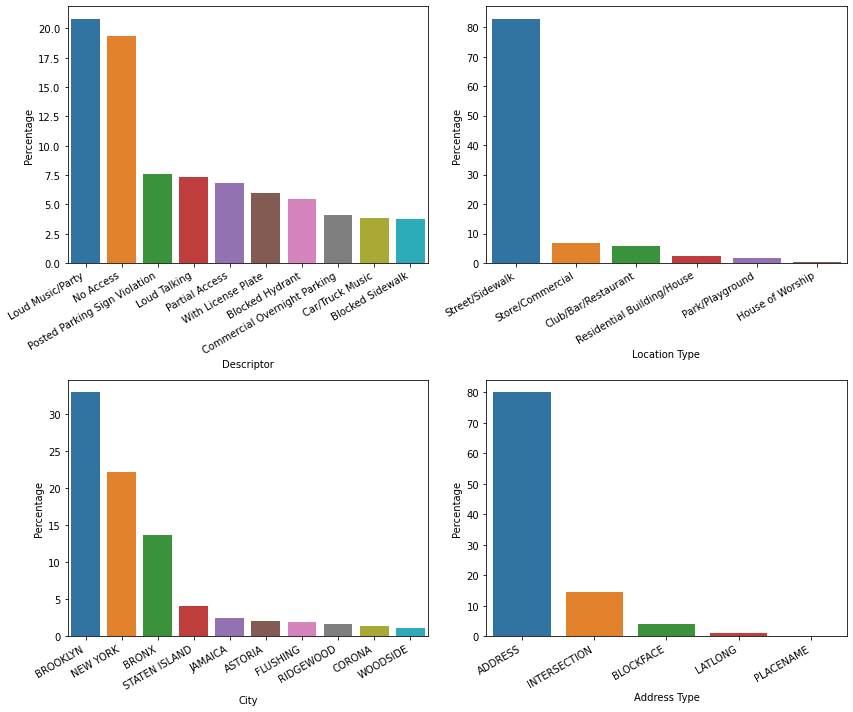

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

#sns.set_theme(style="whitegrid")
#plt.suptitle("Proportion of different outcomes for few interesting features.")

descriptor = sns.barplot(ax=ax[0,0],x=data_descriptor.Descriptor,y=data_descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

location_type = sns.barplot(ax=ax[0,1],x=data_location_type['Location Type'],y=data_location_type.Percentage,)
location_type.set_xticklabels(location_type.get_xticklabels(), rotation=30, ha="right")

city = sns.barplot(ax=ax[1,0],x=data_city['City'],y=data_city.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address = sns.barplot(ax=ax[1,1],x=data_address_type['Address Type'],y=data_address_type.Percentage,)
address.set_xticklabels(address.get_xticklabels(), rotation=30, ha="right")


#plt.subplots_adjust(left=None, bottom=None, right=None, top=0.0, wspace=None, hspace=None)
plt.tight_layout()

So it is obvious that the Loud Music/party causes the biggest problem for the citizens. And it seems most complaints occur at Street/Sidewalk. And 'Brooklyn' faces the largest problems among all other cities. However, we have mostly solid information.  The place where the problem occurs is pinpointed (Proper Address).

These observations are very preliminary. One can expect or guess the outcomes from these visualizations, regarding the corresponding features. However, it needs to be realized that we can not infer/predict from here without any proper statistical explanation.

Now, let's convert the time data ('timedelta64') into integer and store them (converting into hours) in a new column. Besides that let us cut the ambiguous data.

In [77]:
data_place_CType_RCTime = data_mod[['City','Complaint Type','Request_Closing_Time']]
data_place_CType_RCTime.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)
neg_time = data_place_CType_RCTime[data_place_CType_RCTime['DeltaT(in_hr.)'] < 0].sum()
print('The no negative time difference (Created Time > Clossing Time, which is not possible) = \n',neg_time)
#data_place_CType_RCTime['DeltaT(in sec)/Avg.'] = np.around((data_place_CType_RCTime['DeltaT(in sec)']/Avarage_time),decimals=1)
data_place_CType_RCTime.head(6)

TypeError: float() argument must be a string or a number, not 'Timedelta'

In [ ]:
Avarage_time = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Avarage time gap between logging the complaint and problem solved = ',Avarage_time, 'hour')
Central_val = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

So, one can take the central value as the normal time taken to solve the problem/issue. However, as it is clear from the deviation that it spreads around 6 hr.(more than the central value) from the distribution, so it is more practical to choose average time as the normal time to solve the problem. And categorize time interval as per the codes written below. 

In [ ]:
conditions = [data_place_CType_RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < data_place_CType_RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)

In [ ]:
data_place_CType_RCTime.head(6)

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts()

In [ ]:
data_place_CType_RCTime['Solution Status'].value_counts().plot(kind='bar')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()

Based on the above-discussed approximation, the proportion of the time interval (expressed in different groups/status) to solve the problem, is depicted here. And it is obvious that the 'Normal' status will dominant since the range is chosen around the average value.

Now, let's see, is there any pattern for lodging a complaint?

Does it depend on a particular day or is there any month where too much or fewer problems are recorded?

In [ ]:
data_mod['Created Date'].head(5)

In [ ]:
# Creating a data frame Contain Days and Months of Complaint date

Year_Month_Day = pd.to_datetime(data_mod['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)

In [ ]:
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
Month_plot

In [ ]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['Counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()

So there is nothing abrupt for the months of lodging complaint. However, a very small amount of complaints recorded in the month of March.

The same observation can be made for the days. But if we look carefully, there is a small increment on the weekends compared to the weekly days. 

However, looking at the days of a year might hide some extra information. It is better to check the days of each month of the year.

In [ ]:
Month_Day_grouped = Month_Day.groupby(['Month Name','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(15)

In [ ]:
Month_Day[( (Month_Day['Month Name'] == 'Apr') & (Month_Day['Day Name'] == 'Monday') )].count()

This is just to check whether the grouping operation is done correctly or not.


As you can see below, complaints created in each month for all seven days of the week are plotted. As we already counter that in March there is an abrupt decrement of complaint lodging compared to the other months. And Only three days of a week contributed here. It may contain seven days of the week, but with a very lesser amount. So let's check that to as well from the numbers.

In [ ]:
plt.figure(figsize=(20,8))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month Name'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in different months of the year')
plt.show()
plt.tight_layout()

In [ ]:
Month_Day_grouped[Month_Day_grouped['Month Name'] == 'Mar']

-  So complaints are recorded only in these three days of March.
-  And let's have a look quickly at the status of the complaints.

In [ ]:
data_mod['Status'].value_counts().plot(kind='barh')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Proportion of different Solution status')
plt.show()
plt.tight_layout()

### 5. Perform a statistical test for the following:

(For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.)

 - Whether the average response time across complaint types is similar or not (overall)
 - Are the type of complaint or service requested and location related?

In [ ]:
import scipy.stats as stat

 - Whether the average response time across complaint types is similar or not (overall)

In [ ]:
# Average response time across complaint types 

Complaint_AvgTime = data_place_CType_RCTime.groupby(['Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_AvgTime = pd.DataFrame(Complaint_AvgTime)
Complaint_AvgTime = Complaint_AvgTime.sort_values(['DeltaT(in_hr.)']).reset_index()
Complaint_AvgTime

#### 1. T-test
#### (a) 1-sample T-test

It is noteworthy that the value of the Avg. time due to complaint type 'Animal in a Park' quite out of the range. Let's find out the average with or without this particular complaint type.

In [ ]:
Tmean_without = float(Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park'].mean())
print("Without complaint type 'Animal in a Park' ----- ",Tmean_without)
Tmean_with = float(Complaint_AvgTime['DeltaT(in_hr.)'].mean())
print("With complaint type 'Animal in a Park' ----- ",Tmean_with)

In [ ]:
ttest_with, pval_with = stat.ttest_1samp(Complaint_AvgTime['DeltaT(in_hr.)'], Tmean_with)
print('T-statistic is =',ttest_with)
print('p value is =',np.around(pval_with))

In [ ]:
if (pval_with<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_with,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_with,decimals=2)))

#### Without complaint type 'Animal in a Park'

In [ ]:
Complaint_AvgTime_without = Complaint_AvgTime.drop([len(Complaint_AvgTime)-1],axis=0)
Complaint_AvgTime_without

In [ ]:
ttest_without, pval_without = stat.ttest_1samp(Complaint_AvgTime_without['DeltaT(in_hr.)'], Tmean_without)
print('T-statistic is =',ttest_without)
print('p value is =',np.around(pval_without,decimals=8))

In [ ]:
if (pval_without<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_without,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_without,decimals=2)))

-  With or without the Hypothesis remain the same.

#### (b) 2-sample T-test

In [ ]:
sample1 = Complaint_AvgTime.sample(frac=.5)
sample1

In [ ]:
sample2 = Complaint_AvgTime.drop(sample1.index)
sample2

In [ ]:
print('Mean of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2['DeltaT(in_hr.)'].std()),decimals=2))

In [ ]:
ttest_2sp, p_val = stat.ttest_ind(sample1['DeltaT(in_hr.)'],sample2['DeltaT(in_hr.)'])
print('T-statistic is =',ttest_2sp)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

#### 2. One way F-test (ANOVA)

In [ ]:
sample1_anova = Complaint_AvgTime.sample(frac=1/3)
sample1_anova

In [ ]:
rest_data = Complaint_AvgTime.drop(sample1_anova.index)
rest_data

In [ ]:
sample2_anova = rest_data.sample(frac=1/2)
sample2_anova

In [ ]:
sample3_anova = rest_data.drop(sample2_anova.index)
sample3_anova

In [ ]:
print('Mean of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 1st sample =',np.around(float(sample1_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 2nd sample =',np.around(float(sample2_anova['DeltaT(in_hr.)'].std()),decimals=2))
print('Mean of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].mean()),decimals=2))
print('Standard dev. of 3rd sample =',np.around(float(sample3_anova['DeltaT(in_hr.)'].std()),decimals=2))

#### (a) Shapiro-Wilk normality test for each data group

In [ ]:
f_val,p_val = stat.shapiro(sample1_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
f_val,p_val = stat.shapiro(sample2_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
f_val,p_val = stat.shapiro(sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

 - All p values are greater than 0.05
 - Fail to reject the null hypothesis
 - Samples come from populations that follow normal distribution

#### (b) Levene variance test  

In [ ]:
f_val,p_val = stat.levene(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

#### (d) Again independent 2-sample T-test

We already checked the independent T-test for 2 samples. Let's do the same for 3 samples and check the consistency.

In [ ]:
t_val,p_val = stat.ttest_ind(sample1_anova['DeltaT(in_hr.)'],sample2_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 1 and 2 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
t_val,p_val = stat.ttest_ind(sample1_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 1 and 3 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
t_val,p_val = stat.ttest_ind(sample2_anova['DeltaT(in_hr.)'],sample3_anova['DeltaT(in_hr.)'])
print('T-statistic for sample 2 and 3 is =',t_val)
print('p value is =',np.around(p_val,decimals=2))

 - All the cases p-value is greater than 0.05
 - Fail to reject the null hypothesis.

All the tests (T-test, F-test) provide a common conclusion. That is we fail to reject the 'Null hypothesis'. 

 - Null Hypothesis states - there is no significant relationship among the average response time across complaint types

 - Alternate Hypothesis states - there is a significant relationship among the average response time across complaint types

Thus we may conclude that there is no significant relationship among the average response time across complaint types or they are not similar types.

 - Are the type of complaint or service requested and location related?

In [ ]:
print('Null data in Complaint Type =',data_mod['Complaint Type'].isnull().sum())
print('Null data in City =',data_mod['City'].isnull().sum())

In [ ]:
df_cc = data_mod[['Complaint Type','City']]
df_cc = df_cc.dropna()
#df_cc.isnull().sum()
#df_cc

In [ ]:
City_Complaint = pd.crosstab(data_mod['Complaint Type'],data_mod['City'],margins=True, margins_name='Total')
#City_Complaint = pd.crosstab(df_cc['Complaint Type'],df_cc['City'])
City_Complaint.head(6)

Applying the ANOVA for a few combinations and let's see how does it go?

In [ ]:
print("For 'ARVERNE' and 'ASTORIA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['ASTORIA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'ARVERNE' and 'BROOKLYN' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['BROOKLYN'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'HOLLIS' and 'JAMAICA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['HOLLIS'],City_Complaint['JAMAICA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

In [ ]:
print("For 'MASPETH' and 'QUEENS' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['MASPETH'],City_Complaint['QUEENS'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

We have seen a few of the pairs. And it seems p-value is around 0.05. This is a very insufficient number of pair checking. So, though it looks like 'neglecting Null Hypothesis', but we can not certain unless checking all pairs ($^{53}{C}_{2}$ combinations for 53 cities). Even for 21 complaint types, it is still $^{21}{C}_{2}$ combinations.

It is more proper to use the chai square contingency test for such data structure. It gives us the correlation between different features (here different cities for a given complaint type).

 - Null Hypothesis states - there is no dependence or relation among the features
 - Alternate Hypothesis states - there is a relation among the features

#### Chai square Contigency test 

In [ ]:
chai2, p_val, df, exp_frq = stat.chi2_contingency(City_Complaint)

In [ ]:
print('Chai square value =',chai2)
print('p-value is =',p_val)

In [ ]:



if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

#### conclusion
Thus we may conclude that there is a relationship between the type of complaint or service requested and location.